In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm


def mid(a,b):
  return sqrtm(np.dot(sqrtm(b),np.dot(a,sqrtm(b))))


Comparing:


1.   MFID - standard 1d FID between ya and yb
2.   JFID - standard 2d FID between (ya,x) and (yb,x)
3.   CFID - E[FID(x)]

(ya,x) and (yb,x) are both bivariate normal
with zero mean, unit variances and different correlations



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


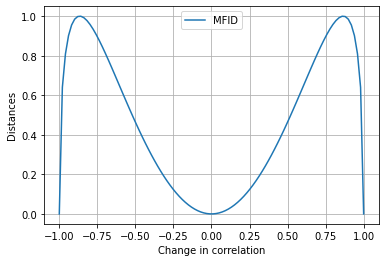

In [2]:
# # correlations 
# ra =  -1.
# rb_list = np.linspace(-1,1.0,100)

# mfid = []
# jfid = []
# cfid = []

# for rb in rb_list:

#   ra = -rb
#   # covariances make sure a[1,1]=b[1,1]
#   a = np.array([[1,ra],[ra,1]])
#   b = np.array([[1,rb],[rb,1]])

#   # conditional variances
#   ca = a[0,0]-a[0,1]**2/a[1,1]
#   cb = b[0,0]-b[0,1]**2/b[1,1]

#   mfid.append(0.0)

#   jfid.append(np.trace(a+b-2*mid(a,b)))

#   cfid.append((a[0,1]-b[0,1])**2/a[1,1]+(ca+cb-2*np.sqrt(ca*cb)))


# plt.plot(rb_list,np.array(cfid)-np.array(jfid),label='MFID')
# # plt.plot(rb_list,mfid,label='MFID')
# # plt.plot(rb_list,jfid,label='RFID')
# # plt.plot(rb_list,cfid,label='CFID')
# plt.xlabel('Change in correlation')
# plt.ylabel('Distances')
# plt.legend()
# plt.grid()
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


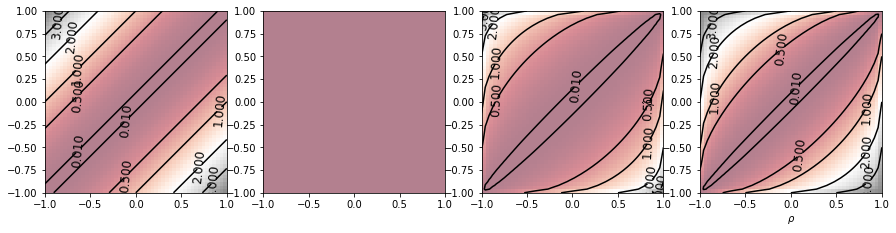

In [21]:
r1 = np.linspace(-1,1.0,50)
r2 = np.linspace(-1,1.0,50)

def L2(r1,r2):
    a,b=np.meshgrid(r1,r2)
    return (a-b)**2
def MFID(r1,r2):
    a,b=np.meshgrid(r1,r2)
    return a*0.
def RFID(r1,r2):
    res1 = []
    for t1 in r1:
        res2 = []
        for t2 in r2:
            C1 = np.array([[1.,t1],
                          [t1,1.]])
            C2 = np.array([[1.,t2],
                          [t2,1.]])
            res2.append(np.real(np.trace(C1+C2 - 2*sqrtm(sqrtm(C2)@C1@sqrtm(C2)))))
        res1.append(res2)
    return np.array(res1)
def CFID(r1,r2):
    res11 = []
    for t1 in r1:
        res22 = []
        for t2 in r2:
            C1 = np.array([[1.,t1],
                          [t1,1.]])
            C2 = np.array([[1.,t2],
                          [t2,1.]])
            C1_x = 1-t1*t1
            C2_x = 1-t2*t2
            # print(np.sqrt(np.sum(((t2-t1)**2+(C1_x+C2_x-2*np.root(C1_x*C2_x)))**2)))
            res22.append(np.real((t2-t1)**2+(C1_x+C2_x-2*np.sqrt(C1_x*C2_x))))
        res11.append(res22)
    return np.array(res11)
metrics = [L2,MFID, RFID, CFID]
#D =cfid(r1[:,None],r2[None,:])
_,axes= plt.subplots(1,4, figsize=(15,35))
for ax, metric in zip(axes,metrics):
    # D= (r1[:,None]-r2[None,:])**2#
    D = metric(r1,r2)
    contours = ax.contour(r1,r2,D,[0.01,0.5,1.0,2.0,3.0],colors='black')
    ax.clabel(contours, inline=True, fontsize=12)
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'$\hat\rho$')
    ax.imshow(D, extent=[-1,1,-1,1], origin='lower',cmap='RdGy', alpha=0.5)
#plt.colorbar()



In [ ]:
# plt.plot(r1,cfid(0,r1))